In [1]:
# The dataset contains daily measurements from a full-scale wastewater treatment plant, including various physiochemical properties that help assess plant performance. The dataset can be used to analyse the plant's operational effectiveness and predict potential faults.
# The objective is to build a machine learning model that predicts whether the wastewater treatment process is operating optimally based on daily measurements of the plant's operational data.

In [2]:
# Importing important Python Libraries
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [3]:
# Reading the csv file
df = pd.read_csv("Data-Melbourne_F.csv")

In [4]:
df.head()

,avg_outflow,avg_inflow,total_grid,Am,BOD,COD,TN,T,TM,Tm,SLP,H,PP,VV,V,VM,VG,year,month,day
0,2.941,2.589,175856,27.0,365.0,730.0,60.378,19.3,25.1,12.6,0.0,56,1.52,10.0,26.9,53.5,79.5,2014,1,1
1,2.936,2.961,181624,25.0,370.0,740.0,60.026,17.1,23.6,12.3,0.0,63,0.00,10.0,14.4,27.8,0.0,2014,1,2
2,2.928,3.225,202016,42.0,418.0,836.0,64.522,16.8,27.2,8.8,0.0,47,0.25,10.0,31.9,61.1,77.8,2014,1,5
3,2.928,3.354,207547,36.0,430.0,850.0,63.000,14.6,19.9,11.1,0.0,49,0.00,10.0,27.0,38.9,53.5,2014,1,6
4,2.917,3.794,202824,46.0,508.0,1016.0,65.590,13.4,19.1,8.0,0.0,65,0.00,10.0,20.6,35.2,53.5,2014,1,7


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1382 entries, 0 to 1381
Data columns (total 20 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   avg_outflow  1382 non-null   float64
 1   avg_inflow   1382 non-null   float64
 2   total_grid   1382 non-null   int64  
 3   Am           1382 non-null   float64
 4   BOD          1382 non-null   float64
 5   COD          1382 non-null   float64
 6   TN           1382 non-null   float64
 7   T            1382 non-null   float64
 8   TM           1382 non-null   float64
 9   Tm           1382 non-null   float64
 10  SLP          1382 non-null   float64
 11  H            1382 non-null   int64  
 12  PP           1382 non-null   float64
 13  VV           1382 non-null   float64
 14  V            1382 non-null   float64
 15  VM           1382 non-null   float64
 16  VG           1382 non-null   float64
 17  year         1382 non-null   int64  
 18  month        1382 non-null   int64  
 19  day   

In [6]:
# Handling Null values
df.isnull().sum()

avg_outflow    0
avg_inflow     0
total_grid     0
Am             0
BOD            0
COD            0
TN             0
T              0
TM             0
Tm             0
SLP            0
H              0
PP             0
VV             0
V              0
VM             0
VG             0
year           0
month          0
day            0
dtype: int64

In [7]:
# Replacing the missing values with the mean of the data
df.fillna(df.mean(), inplace=True)

In [9]:
# Handling the outliers in data
for col in df:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
    
    print(f"Outliers in {col}:")
    print(outliers[col]) 

Outliers in avg_outflow:
533     0.187000
655     6.952000
669     7.211000
670     7.322000
671     7.276000
          ...   
1321    0.000004
1338    7.528000
1339    6.984000
1341    0.000004
1342    0.002000
Name: avg_outflow, Length: 74, dtype: float64
Outliers in avg_inflow:
271     7.900
326     9.622
588     7.364
589     7.966
612     7.225
        ...  
1280    7.265
1304    7.130
1316    6.693
1318    7.310
1326    7.915
Name: avg_inflow, Length: 69, dtype: float64
Outliers in total_grid:
218    116638
568    125886
569    149992
696    398328
703    395208
728    151270
Name: total_grid, dtype: int64
Outliers in Am:
626     17.0
685     18.0
686     18.0
704     18.0
847     81.0
923     93.0
978     78.0
996     13.0
1069    68.0
1109    18.0
1262    68.0
Name: Am, dtype: float64
Outliers in BOD:
12      600.0
124     568.5
179     625.0
225     755.0
300     641.0
305     850.0
311     570.0
320     590.0
363     750.0
367     562.5
370     760.0
394     590.0
435     661

In [11]:
# Removing the outliers using capping method
for col in df:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    df[col] =np.where(df[col]>upper_bound,
         upper_bound,
         np.where(df[col]<lower_bound, lower_bound, df[col] ))

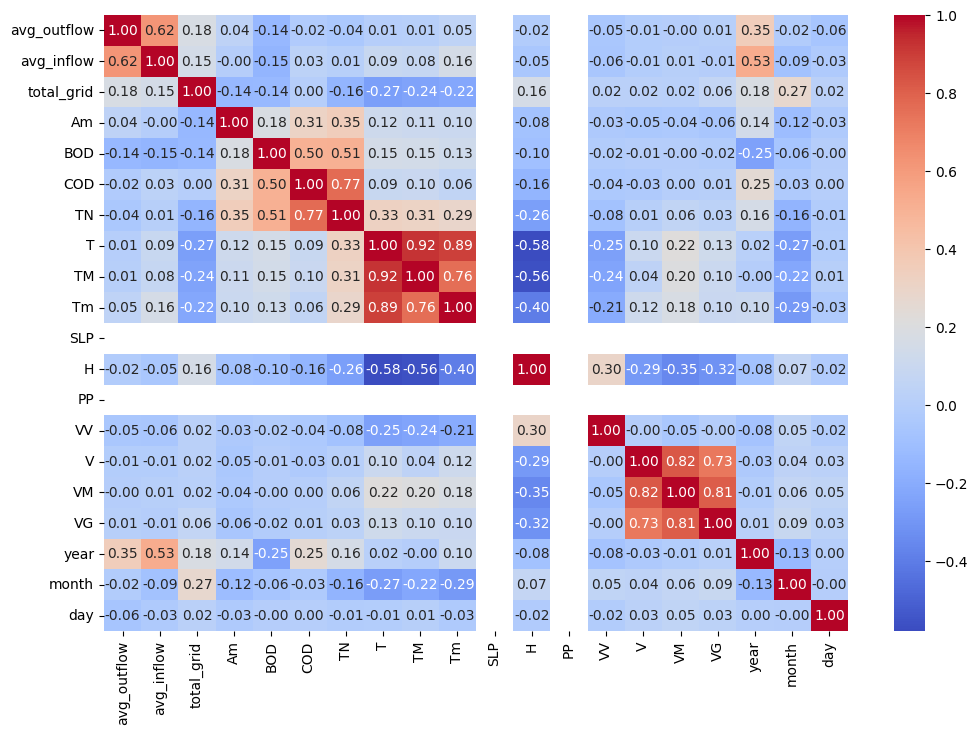

In [12]:
# Analysing the data
plt.figure(figsize=(12, 8))
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.show()

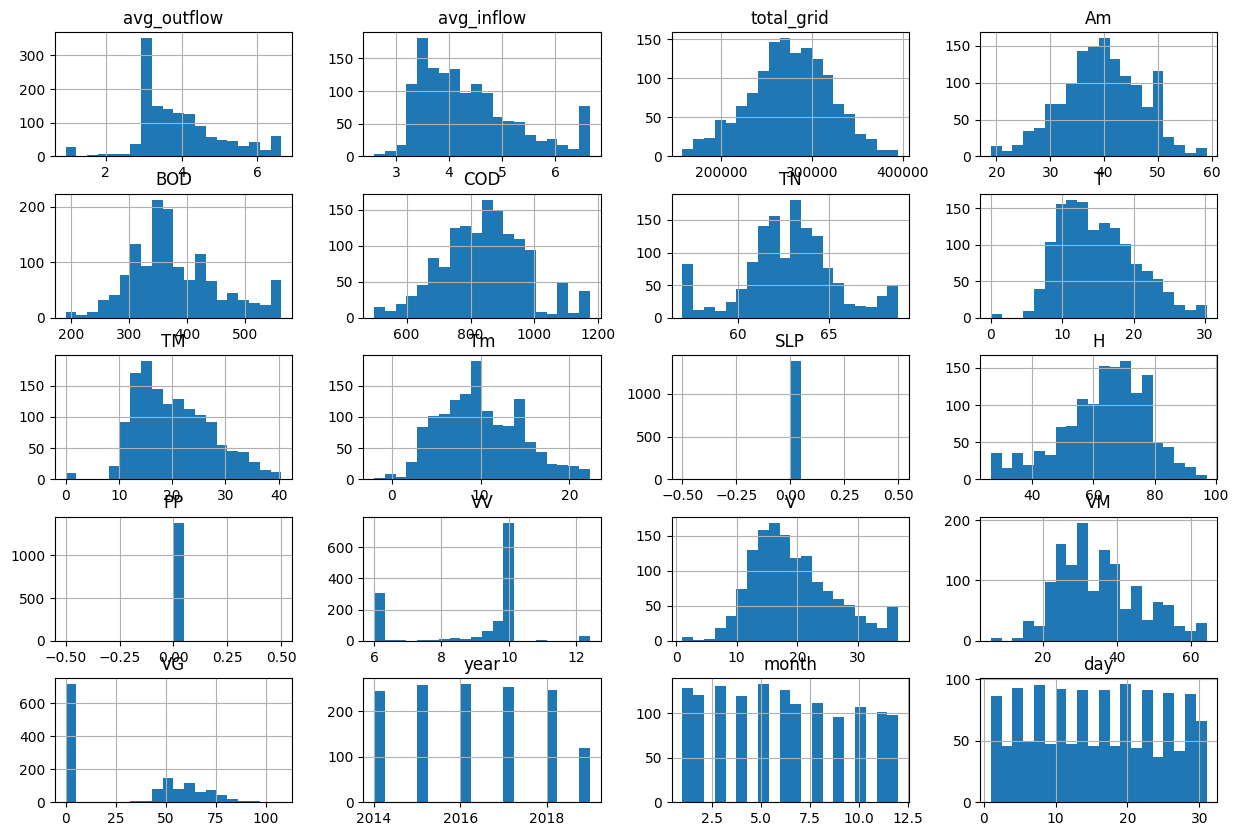

In [14]:
df.hist(bins=20, figsize=(15, 10))
plt.show()

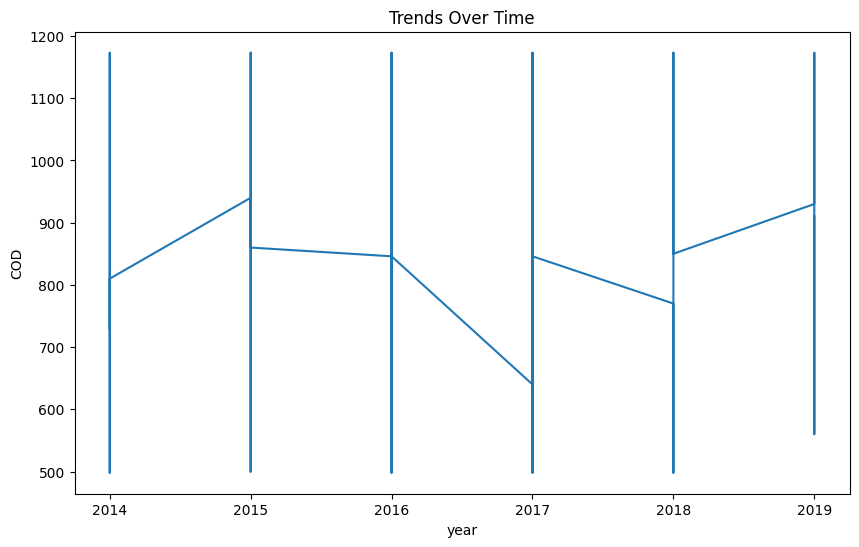

In [15]:
# Checking trends with respect to year
plt.figure(figsize=(10, 6))
plt.plot(df['year'], df['COD'])
plt.xlabel('year')
plt.ylabel('COD')
plt.title('Trends Over Time')
plt.show()

In [16]:
X = df.drop('COD', axis=1)  
Y = df['COD']

In [17]:
# Scaling the data
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [18]:
# Splitting the data into Testing data and Training data
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X_scaled, Y, test_size=0.2, random_state=42)

In [19]:
# Logistic Regression from Scratch

class LogisticRegressionScratch:
    def __init__(self, learning_rate=0.01, epochs=1000):
        self.learning_rate = learning_rate
        self.epochs = epochs
    
    def sigmoid(self, z):
        return 1 / (1 + np.exp(-z))
    
    def fit(self, X, Y):
        self.m, self.n = X.shape
        self.theta = np.zeros(self.n)
        for _ in range(self.epochs):
            z = np.dot(X, self.theta)
            predictions = self.sigmoid(z)
            error = predictions - Y
            self.theta -= self.learning_rate * (1 / self.m) * np.dot(X.T, error)
    
    def predict(self, X):
        z = np.dot(X, self.theta)
        return np.round(self.sigmoid(z))

log_reg_scratch = LogisticRegressionScratch()
log_reg_scratch.fit(X_train, Y_train)
Y_pred_scratch = log_reg_scratch.predict(X_test)

In [20]:
mean_threshold = np.mean(df["COD"])
print("Mean Threshold:", mean_threshold)

Mean Threshold: 843.097554269175


In [21]:
# Logistic Regression from sklearn

#Converting Continuous Data Into Discete Classes
threshold = 843.0975  

Y_train_class = (Y_train > threshold).astype(int)  
Y_test_class = (Y_test > threshold).astype(int)

from sklearn.linear_model import LogisticRegression

log_reg_sklearn = LogisticRegression()
log_reg_sklearn.fit(X_train, Y_train_class)
Y_pred_sklearn = log_reg_sklearn.predict(X_test)

In [22]:
# K Nearest Neighbour 
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, Y_train_class)
Y_pred_knn = knn.predict(X_test)

In [23]:
# Decision Trees
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, Y_train_class)
Y_pred_dt = dt.predict(X_test)

In [24]:
# Random Forests
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, Y_train_class)
Y_pred_rf = rf.predict(X_test)

In [25]:
# Support Vector Machine
from sklearn.svm import SVC

svm = SVC(kernel='linear', random_state=42)
svm.fit(X_train, Y_train_class)
Y_pred_svm = svm.predict(X_test)

In [26]:
# Calculating Different Performance Metrics
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix

def evaluate_model(y_true, y_pred, model_name):
    accuracy = accuracy_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)
    cm = confusion_matrix(y_true, y_pred)
    
    print(f"{model_name} - Accuracy: {accuracy:.4f}, F1-Score: {f1:.4f}")
    print(f"Confusion Matrix:\n{cm}\n")

evaluate_model(Y_test_class, Y_pred_scratch, "Logistic Regression (Scratch)")
evaluate_model(Y_test_class, Y_pred_sklearn, "Logistic Regression (sklearn)")
evaluate_model(Y_test_class, Y_pred_knn, "KNN")
evaluate_model(Y_test_class, Y_pred_dt, "Decision Tree")
evaluate_model(Y_test_class, Y_pred_rf, "Random Forest")
evaluate_model(Y_test_class, Y_pred_svm, "SVM")

Logistic Regression (Scratch) - Accuracy: 0.7798, F1-Score: 0.7932
Confusion Matrix:
[[ 99  27]
 [ 34 117]]

Logistic Regression (sklearn) - Accuracy: 0.8809, F1-Score: 0.8918
Confusion Matrix:
[[108  18]
 [ 15 136]]

KNN - Accuracy: 0.7726, F1-Score: 0.7805
Confusion Matrix:
[[102  24]
 [ 39 112]]

Decision Tree - Accuracy: 0.8592, F1-Score: 0.8713
Confusion Matrix:
[[106  20]
 [ 19 132]]

Random Forest - Accuracy: 0.9097, F1-Score: 0.9191
Confusion Matrix:
[[110  16]
 [  9 142]]

SVM - Accuracy: 0.8953, F1-Score: 0.9079
Confusion Matrix:
[[105  21]
 [  8 143]]



In [28]:
# Perform Hypertuning 
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

grid_search_rf = GridSearchCV(RandomForestClassifier(), param_grid, cv=5)
grid_search_rf.fit(X_train, Y_train_class)

print(f"Best Parameters: {grid_search_rf.best_params_}")
best_rf = grid_search_rf.best_estimator_
Y_pred_rf_tuned = best_rf.predict(X_test)

Best Parameters: {'max_depth': 20, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 100}


In [29]:
evaluate_model(Y_test_class, Y_pred_rf_tuned, "Random Forest (Tuned)")

Random Forest (Tuned) - Accuracy: 0.8953, F1-Score: 0.9068
Confusion Matrix:
[[107  19]
 [ 10 141]]



In [47]:
# Trying Multiple Regression Model on the Given dataset

from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X_train, Y_train_class)

LinearRegression()

In [50]:
predicted_value = lr.predict(X_test)
mean_threshold = np.mean(predicted_value)
print("Mean Threshold:", mean_threshold)

Mean Threshold: 0.5028462712401515


In [51]:
threshold = 0.5028462712401515  

predicted_value_class = (predicted_value > threshold).astype(int)  

In [52]:
evaluate_model(Y_test_class, predicted_value_class, "Multiple Linear Regression")

Multiple Linear Regression - Accuracy: 0.8448, F1-Score: 0.8571
Confusion Matrix:
[[105  21]
 [ 22 129]]

